# Strain Parameters
If a body is strained, this leads to changes of length of lines and changes in the angles between intersecting lines. 


In [1]:
from __future__ import division
from IPython.display import Image
from IPython.display import HTML
import math as m
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as pywid
import os,sys
%matplotlib inline

### Contents
1. [Change in length](#change in length)  
2. [Extension, quadratic extension, reciprocal quadratic extension](#Extension)  
3. [Logarithmic strain and shear strain](#strain)  
4. [Shearing of a rectangle](#shearing)
5. [Deformation Tensor](#deformation)

<a id='change in length'></a>  
## Change in length  
As stated above, strain is defined by change in length through deformation. Two basic parameters describe extension, strain, etc.  
* $l_A$ initial length before deformation  
* $l'_A$ final length after deformation

<img src="extension.PNG">

In [2]:
# initial length
lA = 1.
# length after deformation
lAD = 1.2

<a id='Extension'></a>  
## Extension, Quadratic extension, Reciprocal quadratic extension 
for analysis of small deformation, we calculate the extension $e$ from $l_A$ and $l'_A$.  


$$e(extension) = \frac{l'_A - l_A}{l_A}$$  

for large finite strains, we calculate the quadratic extension $\lambda$  

$$\lambda = \Bigg( \frac{l'_A}{l_A} \Bigg) ^2 = (1+e)^2 $$

in some cases, it is convenient to use the *reciprocal quadratic extension* instead. Logically, it is defined as  

$$ \lambda' = \frac{1}{\lambda} $$

In [3]:
e = (lAD - lA)/lA  
lam = (1 + e)**2
lamP = 1/lam  

print('extension is %.2f' % e)
print("quadratic extension is %.2f" % lam)
print("reciprocal quadratic extension is %.2f" % lamP)

extension is 0.20
quadratic extension is 1.44
reciprocal quadratic extension is 0.69


<a id='strain'></a>  
## Logarithmic strain and shear strain  
Logarithmic strain is a parameter most suited to the examination of different types of progressive deformation sequences (particulary coaxial paths). It is defined as:  

$$\epsilon = log\Bigg(\frac{l'_A}{l_A}\Bigg) $$ 

The logarithmic base can be either 10 or *e*. Looking at the equations for quadratic extension, we can reformulate $\epsilon$ to:  

$$\epsilon = log(1+e) = \frac{1}{2} log\, \lambda $$  

Shear strain is defined by the angular shear strain and is always referred by the angle $\psi$. It is always important if x2 moved clockwise (right-handed shear) or counter-clockwise (left-handed shear). It is defined as:  

$$\gamma = tan\,\psi $$  

Shear strain is a measure of the distance sheared by the perpendicular to the reference direction at unit distance from the reference line. 

Another measure of angular defection combines angular and length parameters. It is termed $\gamma'$.  

$$\gamma' = \frac{\gamma}{\lambda} $$  

<img src="shear.PNG">

In [4]:
eps = m.log(lAD/lA)
eps_lam = m.log(1+e)

psi = 63
gam = m.tan(psi*m.pi/180.)
gamP = gam/lam
print("logarithmic strain is %.3f" % eps)
print("shear strain is %.3f" % gam)
print("gamma prime is %.3f" % gamP)

logarithmic strain is 0.182
shear strain is 1.963
gamma prime is 1.363


<a id='shearing'></a>  
## Shearing of a rectangle
Using the angle $\psi$, we will now shear a rectangle.

In [5]:
def plot_rectangles(psi):
    
    gam = m.tan(psi*m.pi/180.)
    orig_rectangle = np.array([[0,0],[1,0],[1,1],[0,1],[0,0]])
    def_rectangle = np.array([[0,0],[1,0],[gam+1,1],[gam,1],[0,0]])
    
    fig = plt.figure(figsize=(15,10))
    plt.plot(orig_rectangle[:,0],orig_rectangle[:,1],'-',linewidth=2)
    plt.plot(def_rectangle[:,0],def_rectangle[:,1],'r-',linewidth=2)
    plt.xlim([-0.25, 3])
    plt.ylim([-0.25,1.25])
    plt.xlabel("x",fontsize=16)
    plt.ylabel("y",fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.gca().set_aspect('equal', adjustable='box')

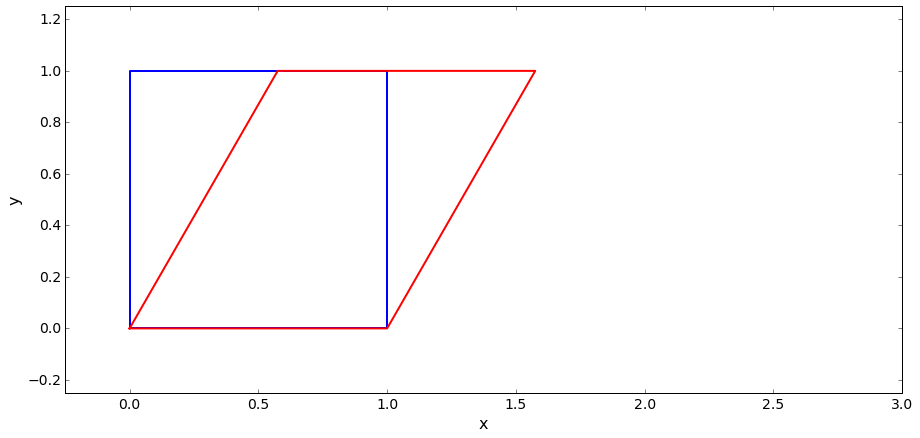

In [6]:
pywid.interact(plot_rectangles,psi=(0.,63.))

<a id='deformation'></a>  
## Deformation Tensors
Using deformation tensors, we can easily transform vectors from an *initial* state to a *deformed* state.
The deformation matrix in 2D can be written as:

$$ D=\left(\begin{array}{rr} D_{11} & D_{12} \\
D_{21} & D_{22}\end{array}\right)$$  

So transformed points $x'_1$ and $x'_2$ can be obtained by:

$$x'_1 = D_{11} x_1 + D_{12} x_2 \\
x'_2 = D_{21} x_1 + D_{22} x_2 $$

In [17]:
def transform(D11,D12,D21,D22,x1,x2):
    
    x1P = D11*x1 + D12*x2
    x2P = D21*x1 + D22*x2
    
    fig = plt.figure(figsize=(10,10))
    plt.scatter(x1,x2,marker='o',s=100)
    plt.scatter(x1P,x2P,marker='o',c='r',s=100)
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.xlabel("x$_1$",fontsize=20)
    plt.ylabel("x$_2$",fontsize=20)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.gca().set_aspect('equal', adjustable='box')

<function __main__.transform>

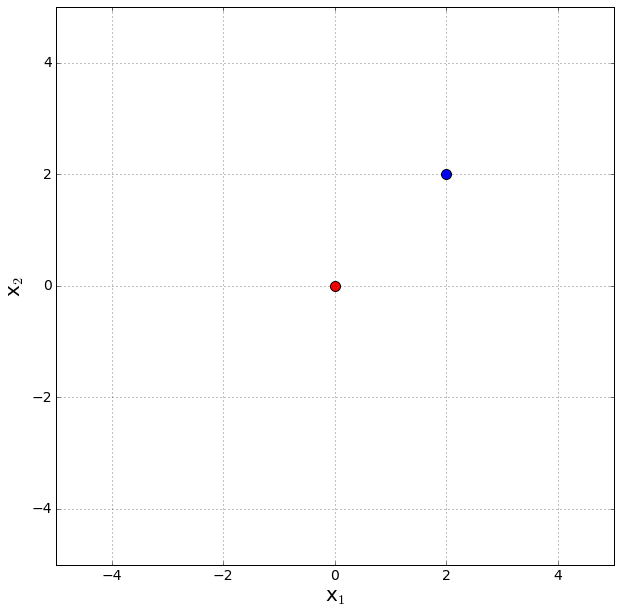

In [18]:
pywid.interact(transform,D11=(-3,3), D12=(-3,3), D21=(-3,3), D22=(-3,3), x1=(0,5), x2=(0,5))